# Introduction

This project focuses on using Polynomial Linear Regression to analyze a dataset from Kaggle. Polynomial regression extends simple linear regression by fitting a curve to capture non-linear relationships between variables. The goal is to build and evaluate a model that accurately predicts outcomes based on input features, showcasing the effectiveness of polynomial regression in modeling complex data patterns.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('rank_salary.csv')

In [3]:
df.head()

,Position,Level,Salary
0,Teaching Assistants,1,45000
1,Guest Faculty,2,50000
2,Contractual Faculty,3,60000
3,Assistant Professor,4,80000
4,Associate Professor,5,110000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [5]:
df.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


In [6]:
df.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

# Exploratory Data Analysis (EDA)

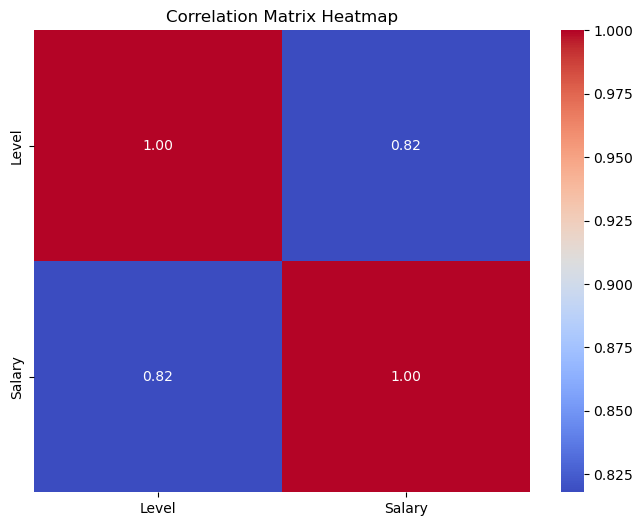

In [7]:
corr = df.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

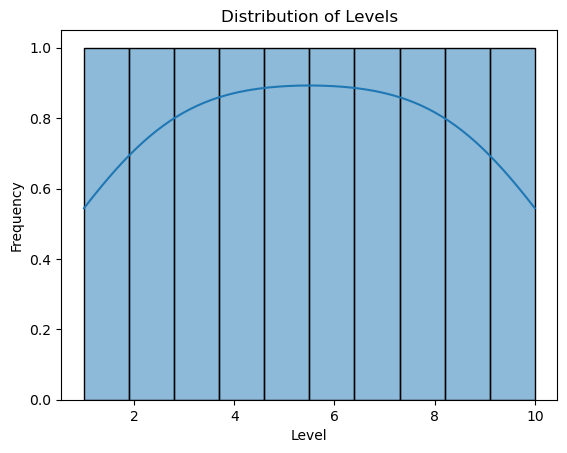

In [8]:
# Distribution of Levels
sns.histplot(df['Level'], kde=True, bins=10)
plt.title('Distribution of Levels')
plt.xlabel('Level')
plt.ylabel('Frequency')
plt.show()

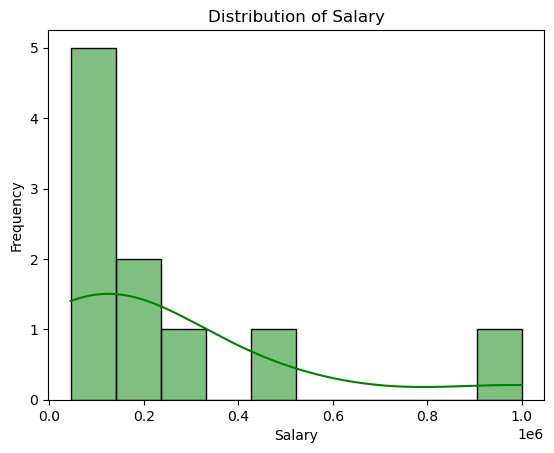

In [9]:
# Distribution of Salary
sns.histplot(df['Salary'], kde=True, bins=10, color='green')
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

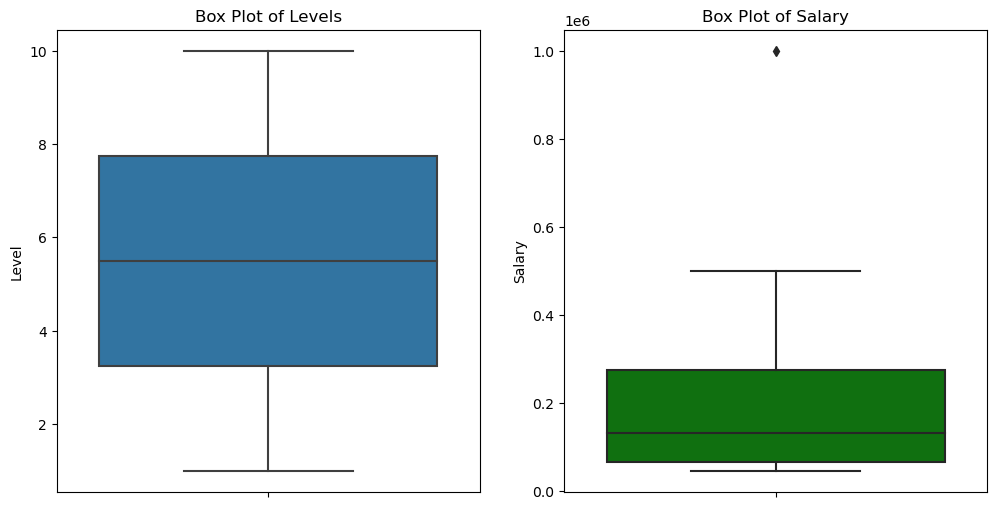

In [10]:
# Box plot for Level and Salary
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Level'])
plt.title('Box Plot of Levels')
plt.subplot(1, 2, 2)
sns.boxplot(y=df['Salary'], color='green')
plt.title('Box Plot of Salary')

plt.show()

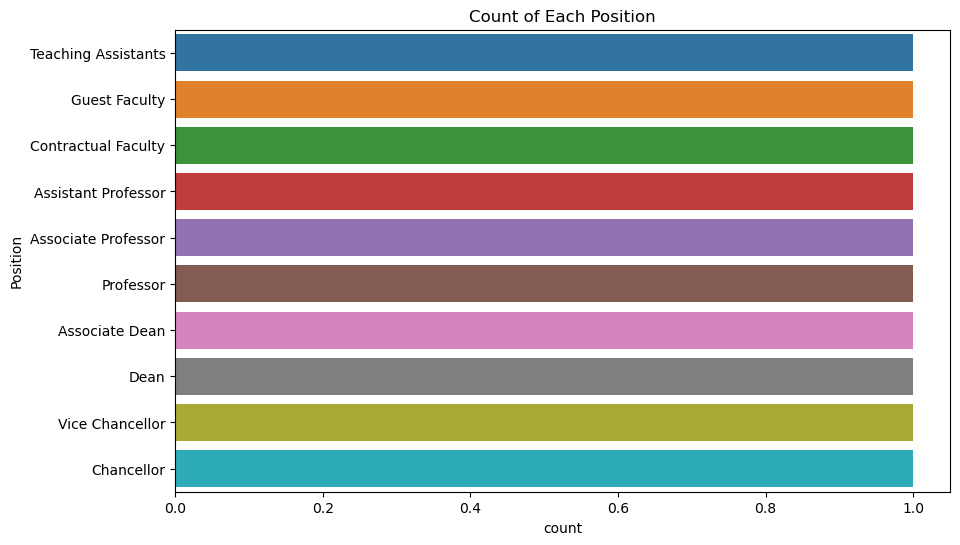

In [11]:
# Bar plot for Position
plt.figure(figsize=(10, 6))
sns.countplot(y='Position', data=df)
plt.title('Count of Each Position')
plt.show()

In [12]:
#handle categorical data
label_encoder = LabelEncoder()
df['Position'] = label_encoder.fit_transform(df['Position'])

In [13]:
X = df[['Level']]  # Features
y = df['Salary']    # Target

# Model Selection and Training

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X_train)
model = LinearRegression()
model.fit(X_poly, y_train)

LinearRegression()

In [16]:
X_test_poly = poly.transform(X_test)
y_pred = model.predict(X_test_poly)

# Model Evaluation

In [17]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.2f}')

Mean Squared Error: 1444499305.55


In [18]:
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2:.2f}')

R-squared: 0.97


# Summary

This project utilized Polynomial Linear Regression to predict salaries based on positions and experience levels. The model achieved a strong R-squared value of 0.97, indicating good predictive power, though the relatively high MSE suggests that further refinement could improve accuracy. Overall, the approach effectively captured the nonlinear relationships within the dataset.